In [132]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from PIL import Image

In [95]:
review = pd.read_csv(r'C:/Users/abdul/Desktop/reviews_final.csv')
inspection = pd.read_csv(r"C:/Users/abdul/Desktop/inspections_final.csv")

In [200]:
rev = review

In [77]:
# function for view full information of cells
def display_dataframe_without_trim():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 100)
    
display_dataframe_without_trim()

### Cleaning and Tokenizing

In [202]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,The food is always good and the prices are reasonable. Although it's not exactly a restaurant -...,2016-01-17 05:26:22
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...,2013-12-28 22:28:08
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,ended up here because Raku was closed and it received great ratings on Yelp. I'm so glad I came...,2014-12-17 19:04:33
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,"Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...",2018-05-28 20:56:05
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...,2013-12-07 00:14:06


In [203]:
CONTRACTION_MAP = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
"haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have",
"he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
"I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not",
"it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
"needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
"she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
"so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
"we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
"what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
"where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
"y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
"you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [204]:
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



expand_contractions("Y'all can't expand contractions I'd think", CONTRACTION_MAP)

'You all cannot expand contractions I would think'

In [213]:
# Expanding contractions
rev['text_clean'] = rev.apply(lambda x: expand_contractions(str(x.text).lower(), CONTRACTION_MAP), axis=1)

In [214]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_clean
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,The food is always good and the prices are reasonable. Although it's not exactly a restaurant -...,2016-01-17 05:26:22,the food is always good and the prices are reasonable. although it is not exactly a restaurant ...
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,ended up here because Raku was closed and it received great ratings on Yelp. I'm so glad I came...,2014-12-17 19:04:33,ended up here because raku was closed and it received great ratings on yelp. i am so glad i cam...
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,"Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...",2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash benedict, and bam ham. eve..."
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...,2013-12-07 00:14:06,we had dinner at the bellagio buffet last night. the service was ok. our server was great but ki...


In [215]:
# tokenize
rev['tokens'] = rev.apply(lambda x: nltk.word_tokenize(str(x.text_clean)), axis=1)

In [216]:
rev.tokens.head()

0    [the, food, is, always, good, and, the, prices, are, reasonable, ., although, it, is, not, exact...
1    [their, pettuccine, was, fresh-made, in, the, morning, ., it, was, very, delicate, and, yummy, !...
2    [ended, up, here, because, raku, was, closed, and, it, received, great, ratings, on, yelp, ., i,...
3    [party, of, 3, ordered, the, fish, tacos, ,, pork, belly, banh, mi, ,, corn, beef, hash, benedic...
4    [we, had, dinner, at, the, bellagio, buffet, last, night, ., the, service, was, ok., our, server...
Name: tokens, dtype: object

In [217]:
from nltk.corpus import stopwords

In [218]:
import string

In [219]:
stop_words = stopwords.words('english')
puncs = list(string.punctuation)
remove = stop_words + puncs
words = nltk.corpus.words.words()

In [220]:
remove

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [221]:
def clean_sent(sent_list):
    sent_list = [word for word in sent_list if word not in remove]
    sent_list = [word for word in sent_list if word.isalpha()]
    return sent_list

In [222]:
rev['tokens_clean'] = rev.apply(lambda x: clean_sent(x.tokens), axis=1 )

In [223]:
rev.tokens_clean.head()

0    [food, always, good, prices, reasonable, although, exactly, restaurant, like, snack, bar, limite...
1    [pettuccine, morning, delicate, yummy, owner, staffs, super, kind, delightful, also, veal, picca...
2    [ended, raku, closed, received, great, ratings, yelp, glad, came, one, better, meals, started, m...
3    [party, ordered, fish, tacos, pork, belly, banh, mi, corn, beef, hash, benedict, bam, ham, every...
4    [dinner, bellagio, buffet, last, night, service, server, great, kind, forgot, us, towards, end, ...
Name: tokens_clean, dtype: object

In [224]:
# pip install wordcloud

In [256]:
rev.shape

(896214, 12)

In [259]:
# drop redundant columns
rev.drop(columns=['text', 'tokens'], inplace=True)

In [261]:
# save files
rev.to_csv(r"C:/users/abdul/Desktop/review_tokenized.csv", encoding='utf-8', index=False)

### Corpus

In [3]:
rev = pd.read_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

In [23]:
rev.head()

,review_id,user_id,business_id,stars,useful,funny,cool,date,text_clean,tokens_clean
0,IByf6mVY0WA838XNSh-5MA,3CJUJILq7CLHk_9OrvpvQg,I4Nr-MVc26qWr08-S3Q1ow,4.0,0,0,0,2016-01-17 05:26:22,the food is always good and the prices are rea...,"['food', 'always', 'good', 'prices', 'reasonab..."
1,qm97yMwREr7BKkexlwLFbg,TTRVdTXKcq-xn6-1IWbwEw,Gyrez6K8f1AyR7dzW9fvAw,5.0,0,0,1,2013-12-28 22:28:08,their pettuccine was fresh-made in the morning...,"['pettuccine', 'morning', 'delicate', 'yummy',..."
2,0AsmPiAQduxh5jE_si8cLA,C_hUvw2z0R-Rv0yZb6QCZA,dm6sO_Y8JdKTE1ZM955yug,5.0,0,0,0,2014-12-17 19:04:33,ended up here because raku was closed and it r...,"['ended', 'raku', 'closed', 'received', 'great..."
3,j3vP8537KHvoXNHQIr3haA,Z_HE_KKT7N-WddPTzUQC7A,jScBTQtdAt-8RshaiBEHgw,5.0,1,0,1,2018-05-28 20:56:05,"party of 3 ordered the fish tacos, pork belly ...","['party', 'ordered', 'fish', 'tacos', 'pork', ..."
4,f0B9-r14-bLudyu5S7aLhw,SvMGr_Oih7ivtzmnCL-Tmg,ujHiaprwCQ5ewziu0Vi9rw,1.0,1,0,0,2013-12-07 00:14:06,we had dinner at the bellagio buffet last nigh...,"['dinner', 'bellagio', 'buffet', 'last', 'nigh..."


In [80]:
sample = rev.sample(n=250000, random_state=42)

In [81]:
sample.reset_index(drop=True, inplace=True)

In [82]:
all_words = []

In [83]:
for i in sample.tokens_clean:
    a = i.split(',')
    for j in a:
        try:
            j = re.findall('[a-z]', j)
            word = ''.join(j)
            all_words.append(word)
        except:
            continue

In [86]:
all_words = list(filter(lambda a: (a != 'las') and (a!='vegas'), all_words))

In [88]:
len(all_words)

12948498

In [87]:
s = pd.Series(all_words)
s.value_counts()[:100]

food          174853
good          144537
place         142433
great         109470
service        99702
like           94188
would          85536
time           81005
one            80170
get            77311
back           74382
go             65099
really         63966
us             57129
order          56682
ordered        55731
also           53359
got            53103
chicken        48607
best           47252
restaurant     45890
even           45134
nice           44849
came           44739
love           44690
try            44530
delicious      42715
always         41308
well           41137
come           40624
menu           39812
definitely     39073
could          39028
first          37036
little         36636
amazing        36002
friendly       35573
staff          34525
eat            33997
much           33006
never          32750
pretty         32165
went           31419
made           30841
fresh          30812
better         30443
people         30324
wait         

### Word cloud

In [89]:
from wordcloud import WordCloud
all_words_ = ' '.join(all_words)

In [108]:
cloud = WordCloud(background_color="white", width=1600, height=800, max_words=100, random_state=42).generate(all_words_)

(-0.5, 1599.5, 799.5, -0.5)

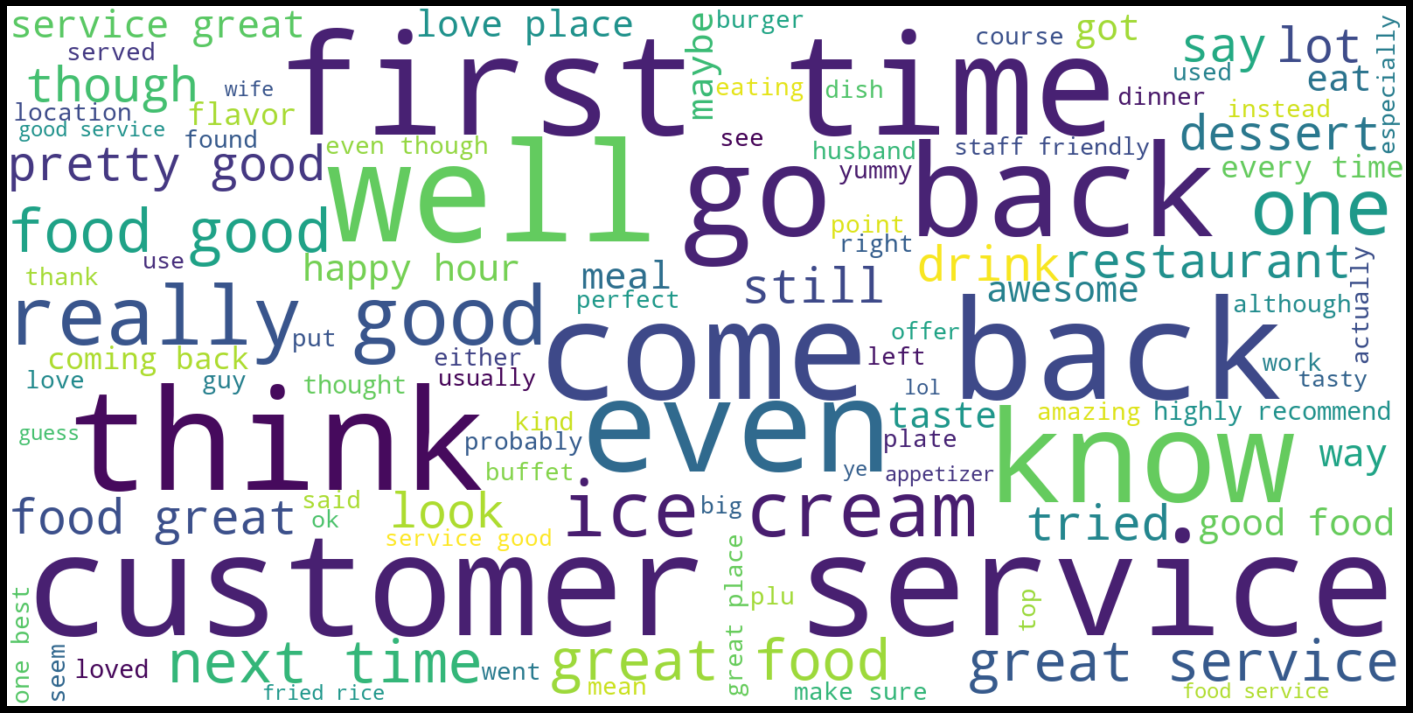

In [127]:
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(cloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')

In [128]:
cloud.to_file(r"C:/Users/abdul/Desktop/cloud.png")